<a href="https://colab.research.google.com/github/nurikhsanGIT/Prediksi-Jumlah-Komoditas-Pangan-di-Provinsi-Jawa-Timur-Menggunakan-Pendekatan-PredictiveAnalytics/blob/master/UAS_cleviriadi_23_11_5487.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Prediksi Jumlah Komoditas Pangan di Provinsi Jawa Timur Menggunakan Pendekatan Predictive Analytics**



*   nama  : nur ikhsan cleviriadi
*   nim   : 23.11.5487
*   kelas : 23BDDM2
* link dataset : https://www.kaggle.com/datasets/rakafal/harga-pertanian-jawa-timur



In [1]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib


**EXTRACT FILE ZIP DATABASE DARI DRIVE**

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
zip_path = "/content/drive/MyDrive/#semester 5/data mining/UAS/pangan_jawatimur.zip"
extract_path = "/content/dataset_BDDM/dataset_pangan_jawatimur"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

LOAD DATASET KE KE BENTUK PANDAS

In [4]:
df = pd.read_csv("/content/dataset_BDDM/dataset_pangan_jawatimur/harga_pertanian.csv")
df

,id,id_index,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,periode_update,kategori,jumlah,satuan,tahun
0,1,11,35,JAWA TIMUR,3501,KABUPATEN PACITAN,2020-01,BERAS MEDIUM,8500,RP/KG,2020
1,1,21,35,JAWA TIMUR,3501,KABUPATEN PACITAN,2020-01,BERAS PREMIUM,10500,RP/KG,2020
2,1,31,35,JAWA TIMUR,3501,KABUPATEN PACITAN,2020-01,GABAH KERING GILING,5500,RP/KG,2020
3,1,41,35,JAWA TIMUR,3501,KABUPATEN PACITAN,2020-01,GABAH KERING PANEN,0,RP/KG,2020
4,1,51,35,JAWA TIMUR,3501,KABUPATEN PACITAN,2020-01,JAGUNG PIPIL KERING,4200,RP/KG,2020
...,...,...,...,...,...,...,...,...,...,...,...
15271,2546,152722546,35,JAWA TIMUR,3579,KOTA BATU,2025-07,BERAS PREMIUM,0,RP/KG,2025
15272,2546,152732546,35,JAWA TIMUR,3579,KOTA BATU,2025-07,GABAH KERING GILING,0,RP/KG,2025
15273,2546,152742546,35,JAWA TIMUR,3579,KOTA BATU,2025-07,GABAH KERING PANEN,0,RP/KG,2025
15274,2546,152752546,35,JAWA TIMUR,3579,KOTA BATU,2025-07,JAGUNG PIPIL KERING,0,RP/KG,2025


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15276 entries, 0 to 15275
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   15276 non-null  int64 
 1   id_index             15276 non-null  int64 
 2   kode_provinsi        15276 non-null  int64 
 3   nama_provinsi        15276 non-null  object
 4   kode_kabupaten_kota  15276 non-null  int64 
 5   nama_kabupaten_kota  15276 non-null  object
 6   periode_update       15276 non-null  object
 7   kategori             15276 non-null  object
 8   jumlah               15276 non-null  int64 
 9   satuan               15276 non-null  object
 10  tahun                15276 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.3+ MB


**preprocessing**

In [6]:
df.isnull().sum()

,0
id,0
id_index,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
periode_update,0
kategori,0
jumlah,0
satuan,0


In [7]:
df_clean = df.copy()

In [8]:
df_clean['periode_update'] = pd.to_datetime(df_clean['periode_update'])
df_clean['tahun'] = df_clean['periode_update'].dt.year
df_clean['bulan'] = df_clean['periode_update'].dt.month

In [9]:
df_clean['jumlah'] = (
    df_clean['jumlah']
    .astype(str)
    .str.replace(',', '')
    .str.replace('-', '')
)
df_clean['jumlah'] = pd.to_numeric(df_clean['jumlah'], errors='coerce')

In [10]:
df_clean = df_clean.sort_values(by=['tahun', 'periode_update'])

In [11]:
df_clean['jumlah_lag_1'] = df_clean['jumlah'].shift(1)
df_clean['jumlah_lag_1'] = df_clean['jumlah_lag_1'].fillna(df_clean['jumlah'].median())


In [12]:
df_prep = df_clean.drop(columns=[
    'id',
    'id_index',
    'kode_provinsi',
    'nama_provinsi',
    'satuan'
])

In [13]:
df_prep.columns

Index(['kode_kabupaten_kota', 'nama_kabupaten_kota', 'periode_update',
       'kategori', 'jumlah', 'tahun', 'bulan', 'jumlah_lag_1'],
      dtype='object')

In [14]:

le_kategori = LabelEncoder()
le_kab = LabelEncoder()

df_prep['kategori_enc'] = le_kategori.fit_transform(df_prep['kategori'])
df_prep['kabupaten_enc'] = le_kab.fit_transform(df_prep['nama_kabupaten_kota'])

In [15]:
df_prep.head(10)

,kode_kabupaten_kota,nama_kabupaten_kota,periode_update,kategori,jumlah,tahun,bulan,jumlah_lag_1,kategori_enc,kabupaten_enc
0,3501,KABUPATEN PACITAN,2020-01-01,BERAS MEDIUM,8500,2020,1,4940.0,0,12
1,3501,KABUPATEN PACITAN,2020-01-01,BERAS PREMIUM,10500,2020,1,8500.0,1,12
2,3501,KABUPATEN PACITAN,2020-01-01,GABAH KERING GILING,5500,2020,1,10500.0,2,12
3,3501,KABUPATEN PACITAN,2020-01-01,GABAH KERING PANEN,0,2020,1,5500.0,3,12
4,3501,KABUPATEN PACITAN,2020-01-01,JAGUNG PIPIL KERING,4200,2020,1,0.0,4,12
5,3501,KABUPATEN PACITAN,2020-01-01,KEDELAI,0,2020,1,4200.0,5,12
6,3502,KABUPATEN PONOROGO,2020-01-01,BERAS MEDIUM,8750,2020,1,0.0,0,14
7,3502,KABUPATEN PONOROGO,2020-01-01,BERAS PREMIUM,10500,2020,1,8750.0,1,14
8,3502,KABUPATEN PONOROGO,2020-01-01,GABAH KERING GILING,5362,2020,1,10500.0,2,14
9,3502,KABUPATEN PONOROGO,2020-01-01,GABAH KERING PANEN,4478,2020,1,5362.0,3,14


In [16]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15276 entries, 0 to 15275
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   kode_kabupaten_kota  15276 non-null  int64         
 1   nama_kabupaten_kota  15276 non-null  object        
 2   periode_update       15276 non-null  datetime64[ns]
 3   kategori             15276 non-null  object        
 4   jumlah               15276 non-null  int64         
 5   tahun                15276 non-null  int32         
 6   bulan                15276 non-null  int32         
 7   jumlah_lag_1         15276 non-null  float64       
 8   kategori_enc         15276 non-null  int64         
 9   kabupaten_enc        15276 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(2)
memory usage: 1.0+ MB


**EDA**

In [17]:
df_prep.describe()

,kode_kabupaten_kota,periode_update,jumlah,tahun,bulan,jumlah_lag_1,kategori_enc,kabupaten_enc
count,15276.000000,15276,15276.000000,15276.000000,15276.000000,15276.000000,15276.000000,15276.000000
mean,3540.736842,2022-10-01 03:56:25.074626816,4851.119272,2022.313433,6.238806,4851.442655,2.500000,17.026316
min,3501.000000,2020-01-01 00:00:00,0.000000,2020.000000,1.000000,0.000000,0.000000,0.000000
25%,3515.000000,2021-05-01 00:00:00,0.000000,2021.000000,3.000000,0.000000,1.000000,9.000000
50%,3526.500000,2022-10-01 00:00:00,4940.000000,2022.000000,6.000000,4940.000000,2.500000,18.500000
75%,3574.000000,2024-03-01 00:00:00,8400.000000,2024.000000,9.000000,8400.000000,4.000000,25.000000
max,3579.000000,2025-07-01 00:00:00,45778.000000,2025.000000,12.000000,45778.000000,5.000000,30.000000
std,29.669033,NaN,4393.144452,1.622737,3.416882,4392.969149,1.707881,9.175458


In [18]:
fitur_numerik = ['jumlah', 'jumlah_lag_1', 'bulan', 'tahun']
corr_matrix = df_prep[fitur_numerik].corr()
corr_matrix


,jumlah,jumlah_lag_1,bulan,tahun
jumlah,1.000000,0.529169,-0.019903,0.101516
jumlah_lag_1,0.529169,1.000000,-0.020017,0.101415
bulan,-0.019903,-0.020017,1.000000,-0.126564
tahun,0.101516,0.101415,-0.126564,1.000000


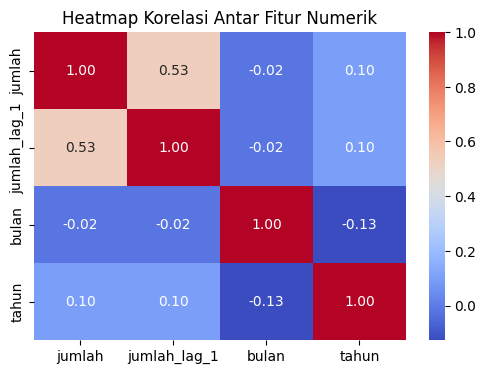

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


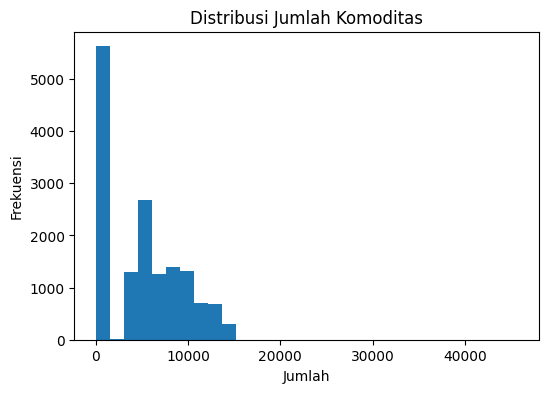

In [20]:
plt.figure(figsize=(6,4))
plt.hist(df_prep['jumlah'], bins=30)
plt.title('Distribusi Jumlah Komoditas')
plt.xlabel('Jumlah')
plt.ylabel('Frekuensi')
plt.show()


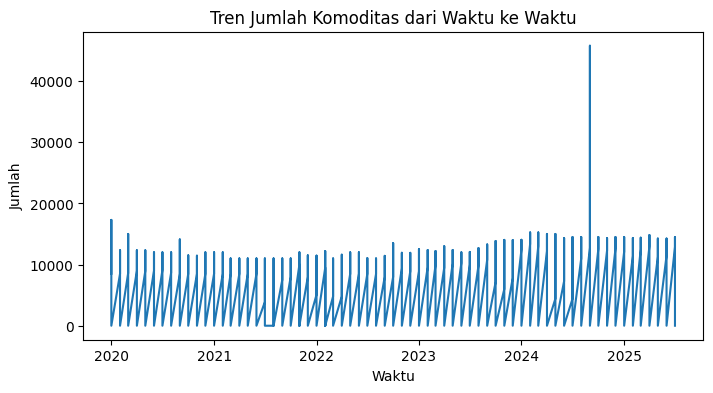

In [21]:
plt.figure(figsize=(8,4))
plt.plot(df_prep['periode_update'], df_prep['jumlah'])
plt.title('Tren Jumlah Komoditas dari Waktu ke Waktu')
plt.xlabel('Waktu')
plt.ylabel('Jumlah')
plt.show()


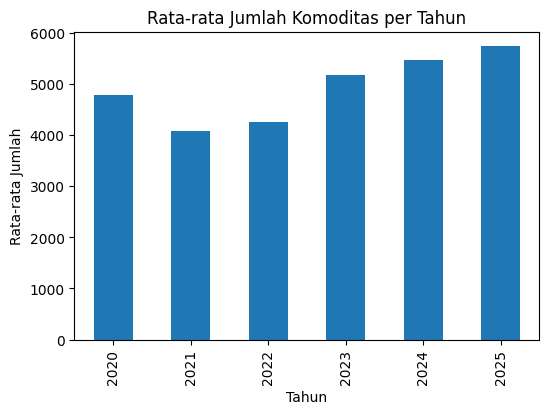

In [22]:
df_year = df_prep.groupby('tahun')['jumlah'].mean()

plt.figure(figsize=(6,4))
df_year.plot(kind='bar')
plt.title('Rata-rata Jumlah Komoditas per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Jumlah')
plt.show()


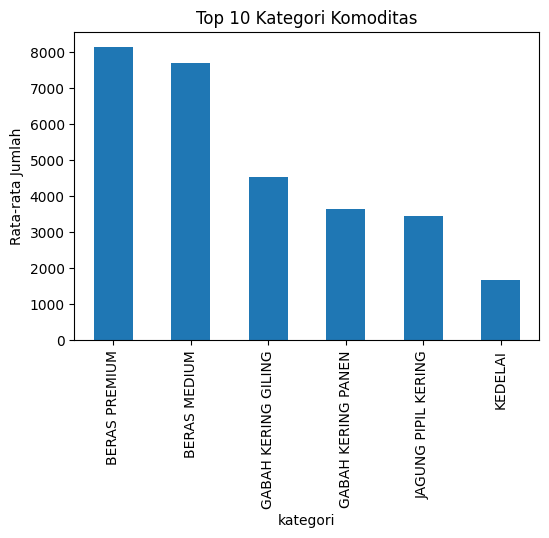

In [23]:
df_kat = df_prep.groupby('kategori')['jumlah'].mean().sort_values(ascending=False)

plt.figure(figsize=(6,4))
df_kat.head(10).plot(kind='bar')
plt.title('Top 10 Kategori Komoditas')
plt.ylabel('Rata-rata Jumlah')
plt.show()


**seleksi fitur**

In [24]:
X_temp = df_prep[['jumlah_lag_1', 'bulan', 'tahun',
                  'kategori_enc', 'kabupaten_enc']]
y_temp = df_prep['jumlah']

rf_temp = RandomForestRegressor(random_state=42)
rf_temp.fit(X_temp, y_temp)

feature_importance = pd.Series(
    rf_temp.feature_importances_,
    index=X_temp.columns
).sort_values(ascending=False)

feature_importance


,0
jumlah_lag_1,0.418787
kategori_enc,0.285564
kabupaten_enc,0.183301
bulan,0.056323
tahun,0.056025


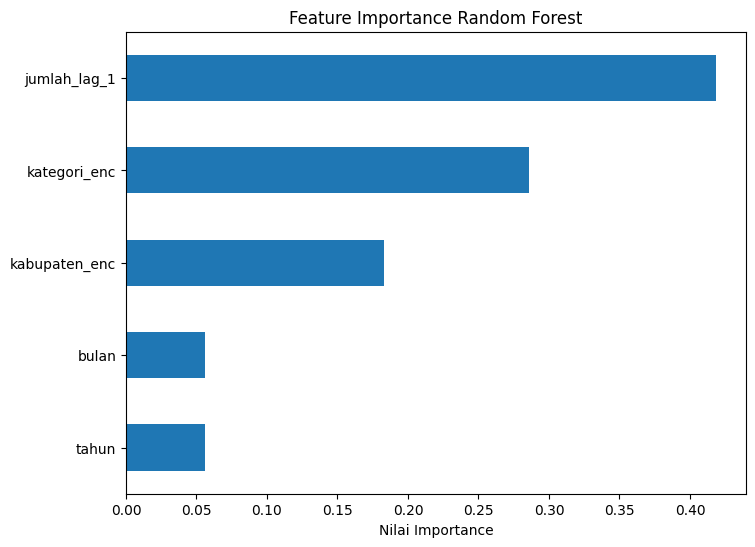

In [25]:
feature_importance.sort_values().plot(kind='barh', figsize=(8,6))
plt.xlabel('Nilai Importance')
plt.title('Feature Importance Random Forest')
plt.show()


**MODELING**

split data

In [26]:
X = df_prep[['tahun', 'bulan', 'kategori_enc', 'kabupaten_enc', 'jumlah_lag_1']]
y = df_prep['jumlah']

In [27]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape)
print("Test :", X_test.shape)


Train: (12220, 5)
Test : (3056, 5)


train model

In [28]:
dt = DecisionTreeRegressor(
    max_depth=10,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)


In [29]:
hasil_dt = pd.DataFrame({
    'Model': ['Decision Tree'],
    'MAE': [mae_dt],
    'RMSE': [rmse_dt],
    'R2': [r2_dt]
})

hasil_dt

,Model,MAE,RMSE,R2
0,Decision Tree,1135.749086,2340.583215,0.70689


In [30]:
rf = RandomForestRegressor(
    n_estimators=300, max_depth=12,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)


In [31]:
hasil_rf = pd.DataFrame({
    'Model': ['Random Forest'],
    'MAE': [mae_rf],
    'RMSE': [rmse_rf],
    'R2': [r2_rf]
})

hasil_rf

,Model,MAE,RMSE,R2
0,Random Forest,1074.600576,2191.045747,0.743147


**Perbandingan 2 model**

In [32]:
hasil = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'MAE': [ mae_dt, mae_rf],
    'RMSE': [rmse_dt, rmse_rf],
    'R2': [r2_dt, r2_rf]
})

hasil

,Model,MAE,RMSE,R2
0,Decision Tree,1135.749086,2340.583215,0.706890
1,Random Forest,1074.600576,2191.045747,0.743147


**kesimpulan**


dari percobaan dengan kedua model diatas random forest menghasilkan nilai MAE dan RMSE yang lebih rendah serta nilai R² yang lebih tinggi dibandingkan Decision Tree. Hal ini menunjukkan bahwa Random Forest memiliki performa prediksi yang lebih baik dan lebih stabil, sehingga dipilih sebagai model terbaik

**menyimpan model**

In [33]:
save_path = '/content/drive/MyDrive/#semester 5/data mining/UAS'
os.makedirs(save_path, exist_ok=True)

save_path

'/content/drive/MyDrive/#semester 5/data mining/UAS'

In [34]:
joblib.dump(dt, f'{save_path}/decision_tree_model.pkl')
joblib.dump(rf, f'{save_path}/random_forest_model.pkl')

print("Semua model berhasil disimpan ke Google Drive:")
print("- Linear Regression")
print("- Decision Tree")
print("- Random Forest")


Semua model berhasil disimpan ke Google Drive:
- Linear Regression
- Decision Tree
- Random Forest
